# 전국 지점별 유통량 데이터 예측 분석

In [1]:
import pandas as pd
import os 
import matplotlib.pyplot as plt
import random
import math
import seaborn as sns
import numpy as np

plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

고객정보 = pd.read_excel('1.1 고객기본정보(개인정보 제외)_추출.xlsx')#
c_ques = pd.read_excel('1.2 고객상담정보(개인정보 제외)_추출.xlsx')#
item_info = pd.read_excel('2.1 상품정보_추출.xlsx')#
i_ques = pd.read_excel('2.2 상품문의정보(개인정보 제외)_추출.xlsx')#
i_review = pd.read_excel('2.3 상품평정보(개인정보 제외)_추출.xlsx')#
o_info = pd.read_excel('3.1 주문정보(개인정보 제외)_추출.xlsx')#
p_info = pd.read_excel('4.1 결제정보(개인정보 제외)_추출.xlsx')#
r_info = pd.read_excel('5.1 환불정보(개인정보 제외)_추출.xlsx')
op_info = pd.read_excel('6.1 옵션정보_추출.xlsx')


## 데이터 불러오기 및 특징

In [2]:
#Table of Contents 기능 이용해서 검색

### 각 데이터의 특징

#### 1-1 고객 정보

In [3]:
고객정보 

,회원번호,회원등급,가입일,최종방문일,본인인증,성별,나이,자주쓰는배송지 도로명,자주쓰는배송지 지번
0,1476,임직원,2016-11-05 00:00:00,2018-04-30 17:34:58,-,M,31,서울 금천구 가마산로 70,-
1,1873,임직원,2017-11-02 15:54:32,2018-11-05 10:12:51,MOBILE,M,32,경기 고양시 일산서구 고양대로 620,경기 고양시 일산서구 일산동 960-6
2,1874,임직원,2017-11-02 15:55:11,2018-11-07 07:27:31,MOBILE,M,39,경기 성남시 분당구 판교역로 4,경기 성남시 분당구 백현동 582-7
3,1875,임직원,2017-11-02 16:08:18,2018-11-05 08:35:48,MOBILE,F,29,서울 은평구 연서로34가길 10-16,서울 은평구 불광동 346-87
4,1876,임직원,2017-11-02 16:10:06,2018-11-06 14:51:02,MOBILE,M,30,서울 영등포구 국제금융로2길 32,서울 영등포구 여의도동 23-8
...,...,...,...,...,...,...,...,...,...
50283,57789,일반,2018-11-07 08:57:25,2018-11-07 08:57:41,MOBILE,M,NaN,-,-
50284,57790,일반,2018-11-07 08:58:23,2018-11-07 08:58:38,NaN,-,NaN,-,-
50285,57791,일반,2018-11-07 09:33:48,2018-11-07 09:34:10,MOBILE,F,NaN,-,-
50286,57792,일반,2018-11-07 09:49:43,2018-11-07 09:49:43,NaN,-,NaN,-,-


회원번호 : 회원들의 정보를 기준으로 생성한 번호

회원등급 : 회원 별 등급을 나눔 ('임직원', '일반' 등)

가입일 : 회원들의 가입일

최종방문일 : 회원이 최종 방문한 시간

본인인증 : 회원들의 본인 인증 방식('휴대전화', 'IPIN' , 'BTOB')

성별 : 회원들의 성별('M', 'F')

나이 : 회원들의 나이

배송지 도로명 : 회원들의 도로명 주소

배송지 지번 : 회원들의 지번 주소

#### 1-2 고객상담정보

In [4]:
c_ques

,상담번호,주문번호,상품번호,회원번호,상담구분,상담유형,상담유형2,상담채널,상담결과,문의내용,답변내용,Unnamed: 11
0,46,1711290939024083,NaN,1899,NaN,NaN,NaN,NaN,처리완료,dkcifgarkjk,jdtoijxljcdsoazjfoiwajrcnf,NaN
1,48,1711291005424091,NaN,1902,NaN,NaN,NaN,NaN,처리완료,배송일자확인,평균배송일 7일 소요/배송전 해피콜 진행 됨 안내,NaN
2,53,1711290941454084,NaN,1899,NaN,NaN,NaN,NaN,처리완료,해당 상품 용량 확인,몇밀리 어느정도 사용 안내,NaN
3,55,1711290915134078,NaN,1896,NaN,NaN,NaN,NaN,처리완료,환불기간,test,NaN
4,59,1711231537223717,NaN,1940,NaN,NaN,NaN,NaN,처리완료,배송준비중으로 확인 되어 언제 발송되는지 문의,해당상품 재고가 없어 구성품은 같지만 한단계 업그레이드된 500W 제품으로 대체발송...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7376,7553,1811061738069362,G1801301010_8818,57340,업체(O/B),주문,주문내역확인,Call,처리완료,오더 확인,[코니페블] 로폴드 마블 테이블 A형 (S) 역방향으로 주문 들어 갔는지 확인/역방...,NaN
7377,7554,1811031529058279,G1808311524_9232,0,업체(O/B),교환,오배송,Call,처리완료,오배송 처리 방법 확인,이미지 접수 요청/고객님 부재/문자발송/[홈데이몰] 안녕하세요. 홈데이몰 고객센터입...,NaN
7378,7555,1811020852507735,G1807040956_9000,55045,업체(O/B),교환,상품하자,Call,처리완료,교환 접수 요청,이미지 전송완료/교환 접수 완료/오늘~내일 출고 예정,NaN
7379,7556,1810141242199477,G1806051842_0920,0,회원(I/B),배송,배송누락,Call,처리완료,1+1으로 주문했는데 1개 받으셨음,1번 단품하셔서 1개 발송 된 것,NaN


상담번호 :  상담 들어온 순서대로 번호를 매긴 것

주문번호 : 회원의 상품 주문정보를 담은 번호

상품번호 : 상품의 정보를 담은 번호

회원번호 : 1-1 회원번호 참고

상담구분 : 회원인지 업체인지 구분하기 위한 항목

상담유형 : 상담 유형의 1차 카테고리

상담유형2 : 상담 유형의 세부적인 2차 카테고리

상담채널 : 전화, 홈페이지 등의 상담 방법

상담결과 : 처리 여부를 확인하는 항목

문의내용 : 회원들의 문의 내용을 담은 항목

답변내용 : 상담사의 답변 내용을 담은 항목

Unnamed: 11 : 임시로 만든 항목

#### 2-1 상품정보

In [5]:
item_info

,상품번호,상품명,업체명,카테고리명,브랜드명,상품구분,대표판매가,배송비,판매상태,전시상태
0,G1708291036_0216,[라이마스] 에어_630630,(주)라이마스,홈데코레이션,LIMAS,일반,220000.0,50000.00 이하 5500.00,품절,N
1,G1708291049_0217,[라이마스] 에어_730350,(주)라이마스,홈데코레이션,LIMAS,일반,275000.0,50000.00 이하 5500.00,품절,N
2,G1708291054_0220,[라이마스] 에어_1200190,(주)라이마스,홈데코레이션,LIMAS,일반,270000.0,50000.00 이하 5500.00,판매중,Y
3,G1708291058_0221,[라이마스] 에어_730190,(주)라이마스,홈데코레이션,LIMAS,일반,165000.0,50000.00 이하 5500.00,판매중,Y
4,G1708291109_0222,[라이마스] 에어_730750,(주)라이마스,홈데코레이션,LIMAS,일반,565000.0,50000.00 이하 5500.00,품절,N
...,...,...,...,...,...,...,...,...,...,...
110793,G1811061735_7415,[가이타이너] 1.8리터 미스틱 티포트_GT-TK578G,에이젯,생활가전,GEITHAINER,일반,39000.0,0,판매중,Y
110794,G1811061752_7419,[보랄] MILAN 커피 드립 포트_HNZ-T770DK,에이젯,생활가전,BORAL,일반,31000.0,0,판매중,Y
110795,G1811061752_7420,[가이타이너] CLASSY 1.8L 보온 티포트_GT-E975TGK,에이젯,생활가전,GEITHAINER,일반,49000.0,0,판매중,Y
110796,G1811061756_7421,[비스카] UFO 로봇청소기_HNZ-R5000VC,에이젯,생활가전,VISKA,일반,59000.0,0,판매중,Y


상품번호 : 상품의 정보를 기준으로 생성한 번호

상품명 : 상품의 이름

업체명 : 상품을 만든 업체 이름

카테고리명 : 상품의 카테고리(가구, 가전, 등..)

브랜드명 : 상품의 브랜드명

상품구분 : 일반 구매, 렌탈, 기업MRO를 인지 구분하기 위한 항목

대표판매가 : 상품의 판매가격

배송비 : 거리에 따른 배송비 정보를 담은 항목

판매상태 : 상품의 판매 상태를 담은 항목

전시상태 : 상품이 전시상태를 담은 항목 

#### 2-2 상품문의정보

In [6]:
i_ques

,상품번호,상품문의번호,입점업체명,회원번호,등록일,답변여부
0,G1708250952_0085,119,YT쇼핑1,1699,2017-08-25 10:02:35,N
1,G1709050949_0672,120,(주)캔디코퍼레이션,1722,2017-09-11 15:36:54,N
2,G1709111053_0888,121,(주)라이마스,1476,2017-09-12 14:37:55,N
3,G1708291036_0216,123,(주)라이마스,1476,2017-09-20 17:55:53,Y
4,G1708291036_0216,124,(주)라이마스,1476,2017-09-20 17:58:08,N
...,...,...,...,...,...,...
1326,G1806010933_9050,3922,월플랜,57776,2018-11-07 10:08:38,N
1327,G1806041540_0335,3923,월플랜,57776,2018-11-07 10:09:00,N
1328,G1806251439_7300,3924,HANDZ,57579,2018-11-07 10:14:15,N
1329,G1806251439_7300,3925,HANDZ,57579,2018-11-07 10:15:34,N


상품번호 : 2-1상품정보 참고

상품문의번호 : 회원들이 상품에 대해 문의한 것을 순서대로 담은 항목

입점업체명 : 해당 상품을 판매하는 업체를 담은 항목

회원번호 : 1-1 회원번호 참고

등록일 :  회원들의 문의 시간을 담은 항목

답변여부 : 상담사의 문의 답변 여부를 담은 항목

#### 2-3 상품평정보

In [7]:
i_review

,상품번호,상품평번호,입점업체명,회원번호,별점,등록일
0,G1708301108_0332,122,(주)라이마스,1714,4,2017-09-13 13:01:31
1,G1709111052_0885,125,(주)라이마스,1476,5,2017-09-20 18:05:32
2,G1709201021_1385,138,하우스플러스(주),1741,5,2017-09-21 18:35:04
3,G1709201039_1390,140,하우스플러스(주),1741,5,2017-09-22 08:54:48
4,G1709201039_1390,141,하우스플러스(주),1476,5,2017-09-22 08:59:25
...,...,...,...,...,...,...
1282,G1810221659_3562,3910,(주)에이치앤케이커머스,54266,5,2018-11-06 19:25:43
1283,G1810171004_1128,3911,오름,54277,5,2018-11-06 19:37:07
1284,G1802281006_6603,3917,바이올,1906,5,2018-11-07 07:18:49
1285,G1810041038_7094,3927,오름,2143,5,2018-11-07 10:32:31


상품번호 : 2-1 상품번호 참고

상품평번호 : 회원들이 상품평을 한 시간을 기준으로 저장한 항목

입점업체명 : 2-2 입점업체명 참고

회원번호 : 1-1 회원번호 참고

별점 : 상품평을 별점으로 메긴 항목

등록일 :  상품평 등록 시간

#### 3-1 주문정보

In [8]:
o_info

,주문번호,순번,주문일시,진행구분,배송지,상품번호,상품명,옵션명,수량,판매가,배송비,쿠폰할인액,회원주문여부,회원번호
0,1711080845542139,1,2017-11-08 08:46:26,환불완료,서울 영등포구 국제금융로2길 32,G1710311847_6746,(임직원 전용)[케라미카] 바뎀 2인홈세트 (11p),NaN,1,48840.0,0.0,9760.0,Y,1876
1,1711080902432145,1,2017-11-08 09:04:28,결제취소,서울 영등포구 국제금융로2길 32,G1710311849_6973,(임직원 전용)[아름다운공간] 스윗도자기 원형디스펜서 (2color/400ml),색상:핑크,1,7800.0,2500.0,1560.0,Y,1876
2,1711080932562165,1,2017-11-08 09:33:20,결제취소,서울 영등포구 국제금융로2길 32,G1710311843_6700,(임직원 전용)[런드레스] 울 캐시미어 스프레이 세다 cedar (4 fl.oz),NaN,1,16200.0,0.0,3240.0,Y,1882
3,1711080934572167,1,2017-11-08 09:35:19,환불완료,서울 영등포구 국제금융로2길 32,G1710311906_7061,(임직원 전용)[트레비앙] 전동 와인 오프너_DM-503,NaN,1,35040.0,3000.0,7000.0,Y,1882
4,1711080944432170,1,2017-11-08 09:45:08,결제취소,서울 영등포구 국제금융로2길 32,G1710311843_6698,(임직원 전용)[런드레스] 패브릭 프레쉬 베이비 Baby (4 fl.oz.),NaN,1,16200.0,0.0,3240.0,Y,1882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24761,1811062357169433,5,2018-11-06 23:59:03,결제완료,경남 진주시 내동면 순환로 425-61,G1805311432_8296,[월플랜] 셀프도배 전문가세트_(풀바른벽지 /롤벽지 택1),종류:전문가세트(풀바른벽지편),1,28000.0,0.0,0.0,Y,57778
24762,1811070212309446,2,2018-11-07 02:21:54,결제완료,충북 청주시 상당구 단재로 316,G1805311443_8348,[월플랜] 풀바른실크벽지 (뮬리 트윙클화이트)_H7011-1,"종류:만능풀바른벽지,벽높이 선택:230cm",3,29700.0,0.0,4460.0,Y,54164
24763,1811070212309446,3,2018-11-07 02:21:54,결제완료,충북 청주시 상당구 단재로 316,G1805311729_8951,[월플랜] 정배솔,NaN,1,12000.0,0.0,1800.0,Y,54164
24764,1811070212309446,4,2018-11-07 02:21:54,결제완료,충북 청주시 상당구 단재로 316,G1806051452_0740,[월플랜] 풀바른합지벽지 (샤인패브릭 바이올렛)_LG54021-6,"종류:만능풀바른벽지,벽높이 선택:230cm",9,53100.0,0.0,7970.0,Y,54164


주문번호 : 회원들이 주문 정보를 담은 항목

순번 : 주문 순번을 담은 항목

주문일시 : 회원들이 주문한 시간을 담은 항목

진행구분 : 환불처리여부, 결제여부 등 주문 수량과 연관되는 항목

배송지 : 회원들이 원하는 배송지 정보를 담은 항목

상품번호 :  상품에 대한 정보를 담은 번호

상품명 : 상품의 이름을 담은 항목

옵션명 : 회원들이 원하는 색상 사이즈 등의 정보를 담은 항목

판매가 : 상품의 판매가

배송비 : 거리에 따른 배송비용

쿠폰할인액 : 적용가능한 쿠폰의 할인액

회원주문여부 : 회원들의 주문 여부를 담은 항목

회원번호 : 1-1 고객정보 참고

#### 4-1 결제정보

In [9]:
p_info

,주문번호,결제번호,결제일시,진행구분명,결제수단,결제금액,카드사,할부개월
0,1709061018150051,18,2017-09-06 10:19:59,완료,신용카드,10500.0,삼성카드,0.0
1,1709111530200146,46,2017-09-11 15:32:42,완료,신용카드,27500.0,삼성카드,0.0
2,1709241514300410,161,2017-09-24 15:24:39,완료,가상계좌,30500.0,NaN,NaN
3,1709261646470481,210,2017-09-26 17:05:03,완료,신용카드,0.0,삼성카드,0.0
4,1709262044350511,233,2017-09-26 20:55:24,완료,신용카드,7500.0,신한카드,0.0
...,...,...,...,...,...,...,...,...
25494,1811070919599475,31813,2018-11-07 09:21:33,완료,적립금,10.0,NaN,NaN
25495,1811070935129481,31817,2018-11-07 09:40:01,완료,적립금,4000.0,NaN,NaN
25496,1811070946109482,31819,2018-11-07 09:47:55,완료,적립금,110.0,NaN,NaN
25497,1811071000329493,31822,2018-11-07 10:02:05,완료,적립금,4000.0,NaN,NaN


주문번호 : 3-1 주문정보 참고

결제번호 : 결제시간을 기준으로 만든 순서를 담은 항목

진행구분명 : 결제 진행 여부

결제수단 : 회원들의 결제수단을 담은 항목

결제금액 : 상품을 결제수단으로 결제한 금액을 담은 항목

카드사 : 결제수단-신용카드일 경우, 이용한 카드사를 담은 항목

할부개월 : 카드결제 시의 할부개월을 담은 항목

#### 5-1 환불정보

In [10]:
r_info

,주문번호,환불번호,진행구분,결제수단,환불금액,할부개월,환불일자
0,1709061012340050,17,취소,신용카드,37000.0,0.0,2017-09-06 10:14:22
1,1709111558160149,48,취소,가상계좌,6850.0,NaN,2017-09-12 16:42:22
2,1709121552530178,71,취소,가상계좌,249500.0,NaN,2017-09-12 15:56:20
3,1709211749040335,121,취소,가상계좌,409200.0,NaN,2017-09-21 17:51:50
4,1709221305150350,128,취소,신용카드,12060.0,0.0,2017-09-22 13:12:27
...,...,...,...,...,...,...,...
3785,1811061326479156,31675,취소,적립금,4000.0,NaN,2018-11-06 13:35:36
3786,1811061404459176,31690,취소,적립금,4000.0,NaN,2018-11-06 14:42:59
3787,1811061417069182,31693,취소,적립금,4000.0,NaN,2018-11-06 19:27:50
3788,1811061527359259,31741,취소,적립금,4000.0,NaN,2018-11-06 16:23:20


주문번호 : 3-1주문정보 참고

환불번호 : 환불완료 시간을 기준으로 생성한 번호

진행구분 : 환불 진행상황을 담은 항목

환불금액 : 환불완료 시, 회원들이 받을 수 있는 환불금액을 담은 항목

할부개월 : 4-1 할부개월 참고

환불일자 : 환불완료된 시간을 담은 항목

#### 6.1 옵션정보

In [11]:
op_info

,상품번호,옵션번호,옵션명,판매가,과세구분,등록일
0,G1708291036_0216,I1708291046_0181,[라이마스] 에어_630630,220000.0,과세,2017-08-29 10:46:31
1,G1708291049_0217,I1708291054_0182,[라이마스] 에어_730350,275000.0,과세,2017-08-29 10:54:01
2,G1708291054_0220,I1708291054_0183,[라이마스] 에어_1200190,270000.0,과세,2017-08-29 10:54:24
3,G1708291058_0221,I1708291058_0184,[라이마스] 에어_730190,165000.0,과세,2017-08-29 10:58:47
4,G1708291109_0222,I1708291114_0185,[라이마스] 에어_730750,565000.0,과세,2017-08-29 11:14:50
...,...,...,...,...,...,...
72042,G1804232017_4172,I1811070953_9427,[렌탈] 코웨이 스스로살균 가습공기청정기 APMS-1014D / 등록비 설치비면제 ...,32400.0,과세,2018-11-07 09:53:20
72043,G1804232017_4167,I1811070953_9428,[렌탈] 코웨이 스스로살균 가습공기청정기 APMS-0815C / 등록비 설치비면제 ...,30900.0,과세,2018-11-07 09:53:57
72044,G1804232017_4165,I1811070954_9429,[렌탈] 코웨이 공기청정기 AP-1013F / 등록비 설치비면제 / 36개월 의무사...,22900.0,과세,2018-11-07 09:54:37
72045,G1804231906_3394,I1811070956_9430,[렌탈] LG전자 퓨리케어 360º 공기청정기 AS181DRWT (18평형) / 등...,29900.0,과세,2018-11-07 09:56:56


상품번호 : 2-1 상품정보 참고

옵션번호 : 상품의 사이즈, 색상, 종류 등의 정보를 번호로 만든 항목

옵션명 :  상품의 사이즈, 색상, 종류 등의 정보를 담음 항목

판매가 : 3-1 주문정보 참고

과세구분 : 과세여부를 구분해놓은 항목

등록일 : 업체가 상품을 등록해놓은 시간을 담은 항목

## 탐색적 데이터 분석 및 데이터 전처리

주문량을 기준으로 데이터 분석

In [12]:
df_주문정보 = o_info.copy()#3-1 데이터 사본 생성
print(df_주문정보['진행구분'].unique()) #진행 구분 내 실질적으로 주문한 내용을 전처리하기 위함

['환불완료' '결제취소' '주문취소' '구매확정' '교환완료' '배송준비중' '환불신청' '배송완료' '배송중' '결제완료'
 '교환신청' '주문완료']


### 주문정보 내 주문량 관련 컬럼 외 제거

In [13]:
df_주문정보.drop(columns = ['순번','주문번호', '배송지', '상품번호', '상품명', '옵션명', '판매가', '배송비','쿠폰할인액','회원주문여부','회원번호'],inplace = True)
df_주문정보.set_index('주문일시')

,진행구분,수량
주문일시,,
2017-11-08 08:46:26,환불완료,1
2017-11-08 09:04:28,결제취소,1
2017-11-08 09:33:20,결제취소,1
2017-11-08 09:35:19,환불완료,1
2017-11-08 09:45:08,결제취소,1
...,...,...
2018-11-06 23:59:03,결제완료,1
2018-11-07 02:21:54,결제완료,3
2018-11-07 02:21:54,결제완료,1


### 진행구분 컬럼 내 실 주문량과 상관없는 값 제거

In [14]:
df_주문정보.drop(df_주문정보.loc[df_주문정보.진행구분 == '환불완료'].index,inplace = True)
df_주문정보.drop(df_주문정보.loc[df_주문정보.진행구분 == '결제취소'].index,inplace = True)
df_주문정보.drop(df_주문정보.loc[df_주문정보.진행구분 == '환불신청'].index,inplace = True)
df_주문정보.drop(df_주문정보.loc[df_주문정보.진행구분 == '주문취소'].index,inplace = True)
df_주문정보.set_index('주문일시')

,진행구분,수량
주문일시,,
2017-11-09 11:23:07,구매확정,5
2017-11-09 11:49:04,구매확정,1
2017-11-09 13:33:28,구매확정,1
2017-11-10 19:11:26,구매확정,1
2017-11-11 08:33:10,구매확정,1
...,...,...
2018-11-06 23:59:03,결제완료,1
2018-11-07 02:21:54,결제완료,3
2018-11-07 02:21:54,결제완료,1


### 결측치 확인

In [15]:
df_주문정보.isnull().sum()

주문일시    0
진행구분    0
수량      0
dtype: int64

추출한 데이터 내 결측치는 없음

### 주문일시 날짜화

In [16]:
#데이터를 시각적 및 분석적으로 용이하게 위해 날짜변환

In [17]:
df_주문정보['주문일시'] = pd.to_datetime(df_주문정보['주문일시'])
df_주문정보['주문일시'] = df_주문정보['주문일시'].dt.date
df_주문정보['주문일시']

12       2017-11-09
13       2017-11-09
14       2017-11-09
16       2017-11-10
17       2017-11-11
            ...    
24761    2018-11-06
24762    2018-11-07
24763    2018-11-07
24764    2018-11-07
24765    2018-11-07
Name: 주문일시, Length: 20712, dtype: object

### 데이터 시각화를 통한 분석 및 분석 결과

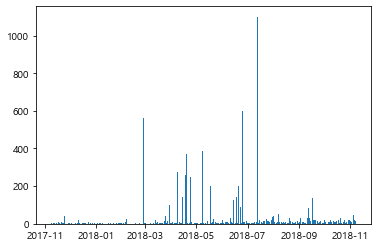

In [18]:
index = np.arange(len(df_주문정보['주문일시']))
index2 = np.arange(len(df_주문정보['수량']))
plt.bar(df_주문정보['주문일시'], df_주문정보['수량'])

plt.show()


분석 결과 : 2017년부터 주문량이 증가하긴 하지만 2018년 7월 이후부터 표본 데이터가 적음

------>  누적 데이터 이용해보기

### 주문일자 기준 날짜별 주문 총량 구하기

In [19]:
df_주문일시_기준 = df_주문정보.groupby(['주문일시']).sum()
print(df_주문일시_기준.value_counts)
print(df_주문일시_기준.iloc[0].values)

<bound method DataFrame.value_counts of              수량
주문일시           
2017-11-09    7
2017-11-10    1
2017-11-11   45
2017-11-12   20
2017-11-13   85
...         ...
2018-11-03   80
2018-11-04  101
2018-11-05  247
2018-11-06  315
2018-11-07   62

[359 rows x 1 columns]>
[7]


In [20]:
누적주문량_리스트= [7] #누적 주문량을 담을 리스트
for x in range(0,len(df_주문일시_기준)-1):#리스트에 넣기위한 반복문
    sub = 누적주문량_리스트[x] +df_주문일시_기준['수량'].iat[x+1]# 값 추출
    누적주문량_리스트.append(sub) #리스트 안에 저장하기
    
# 누적 일수는 주문일시가 빠짐없이 기록되었다는 전제하에 인덱스 크기를 기준으로 작성
df_주문일시_기준['누적주문량'] = 누적주문량_리스트 #데이터 프레임에 새 컬럼 추가
df_주문일시_기준['누적일수'] = range(1,len(df_주문일시_기준)+1) #누적일수 = 인덱스 총량
df_주문일시_기준


,수량,누적주문량,누적일수
주문일시,,,
2017-11-09,7,7,1
2017-11-10,1,8,2
2017-11-11,45,53,3
2017-11-12,20,73,4
2017-11-13,85,158,5
...,...,...,...
2018-11-03,80,36761,355
2018-11-04,101,36862,356
2018-11-05,247,37109,357


# 데이터 선형 회귀 분석

## x,y값 선정

x 값 = 누적 일수
y 값 = 누적 주문량

## 단순 선형 회귀 그래프 (y = ax+b) 시각화

[  105.94611169 -7356.08561958]


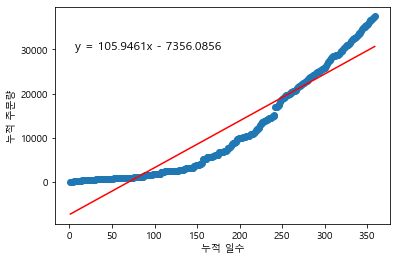

In [21]:
from sklearn.metrics import r2_score
df_주문일시_기준["누적일수"]

fit_line = np.polyfit(df_주문일시_기준["누적일수"],df_주문일시_기준["누적주문량"],1)
# y = 105.9461x - 7356.0856
print(fit_line)
누적일수_minmax = np.array([min(df_주문일시_기준["누적일수"]),max(df_주문일시_기준["누적일수"])])

plt.scatter(df_주문일시_기준["누적일수"], df_주문일시_기준["누적주문량"], label = '주문량')

fit_test1수량 = 누적일수_minmax * fit_line[0] +fit_line[1]#x 축 최소 최대값을 회귀식에 대입한 값

plt.plot(누적일수_minmax, fit_test1수량, color = 'red')
plt.xlabel('누적 일수')
plt.ylabel('누적 주문량')
plt.text(7,30000, "y = 105.9461x - 7356.0856",size = 12)
plt.show()

## 결정계수(r2)을 통한 정확도 분석

In [22]:
추정치_주문건수 = np.array(df_주문일시_기준["누적일수"])*fit_line[0] + fit_line[1]
r2 = r2_score(df_주문일시_기준["누적주문량"],추정치_주문건수)
print("r2 :  ", round(r2,1))
print("\nr2값이 1에 가까우므로 신뢰도 높음")

r2 :   0.9

r2값이 1에 가까우므로 신뢰도 높음


# 700일 후의 유통량 예측

In [23]:
pre_day = 700

pre_order = round(105.9461 * pre_day + -7356.0856)

print(f"위 데이터를 토대로 한 해당 온라인 쇼핑몰 개설 후 700일 후의 누적 주문량은 {pre_order}건 입니다 ")

위 데이터를 토대로 한 해당 온라인 쇼핑몰 개설 후 700일 후의 누적 주문량은 66806건 입니다 
